# **Exploratory Data Analysis**

In [189]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [190]:
# Import the training file
df_train = pd.read_parquet("/Users/louisleibovici/Documents/VS_Code/Bike_counters DSB Project/bike_counters/data/train.parquet")
df_test = pd.read_parquet("/Users/louisleibovici/Documents/VS_Code/Bike_counters DSB Project/bike_counters/data/final_test.parquet")
# df_train = pd.read_parquet("/Users/srazjman/Python/bike_counters/data/train.parquet")

### **EDA of External Data : weather data**

In [191]:
external_data = pd.read_csv("/Users/louisleibovici/Documents/VS_Code/Bike_counters DSB Project/bike_counters/external_data/weather_data.csv.gz", sep=';')
# external_data = pd.read_csv("/Users/srazjman/Python/bike_counters/external_data/external_data.csv")

In [192]:
external_data.head()

,NUM_POSTE,NOM_USUEL,LAT,LON,ALTI,AAAAMMJJHH,RR1,QRR1,DRR1,QDRR1,...,INS,QINS,INS2,QINS2,TLAGON,QTLAGON,TVEGETAUX,QTVEGETAUX,ECOULEMENT,QECOULEMENT
0,75106001,LUXEMBOURG,48.844667,2.333833,46,2020010100,0.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,75106001,LUXEMBOURG,48.844667,2.333833,46,2020010101,0.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,75106001,LUXEMBOURG,48.844667,2.333833,46,2020010102,0.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,75106001,LUXEMBOURG,48.844667,2.333833,46,2020010103,0.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,75106001,LUXEMBOURG,48.844667,2.333833,46,2020010104,0.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [193]:
external_data.shape

(156599, 204)

In [194]:
# Convert the AAAAMMJJHH column to datetime
external_data['date'] = pd.to_datetime(external_data['AAAAMMJJHH'], format='%Y%m%d%H')
external_data = external_data.drop(columns=['AAAAMMJJHH'])

In [195]:
import datetime

# Assuming `train` and `test` are DataFrames with a 'date' column
# Convert 'date' column to datetime if not already in the correct format
df_train['date'] = pd.to_datetime(df_train['date'])
df_test['date'] = pd.to_datetime(df_test['date'])
external_data['date'] = pd.to_datetime(external_data['date'])

# Filter weather data to only include rows relevant to the train and test set
filtered_weather = external_data[
    (external_data['date'] >= df_train['date'].min() - datetime.timedelta(hours=1)) &
    (external_data['date'] <= df_test['date'].max() + datetime.timedelta(hours=1))
]

In [196]:
filtered_weather.shape

(58246, 204)

In [197]:
# Get a description of the 'date' column
date_description = {
    "Earliest Date": filtered_weather['date'].min(),
    "Latest Date": filtered_weather['date'].max(),
    "Number of Unique Dates": filtered_weather['date'].nunique(),
    "Total Missing Dates": filtered_weather['date'].isnull().sum(),
    "Data Type": filtered_weather['date'].dtype
}

# Print the description
for key, value in date_description.items():
    print(f"{key}: {value}")

Earliest Date: 2020-09-01 00:00:00
Latest Date: 2021-10-18 22:00:00
Number of Unique Dates: 9911
Total Missing Dates: 0
Data Type: datetime64[ns]


In [198]:
filtered_weather.nunique()

NUM_POSTE         6
NOM_USUEL         6
LAT               5
LON               5
ALTI              5
               ... 
TVEGETAUX         0
QTVEGETAUX        0
ECOULEMENT        0
QECOULEMENT       0
date           9911
Length: 204, dtype: int64

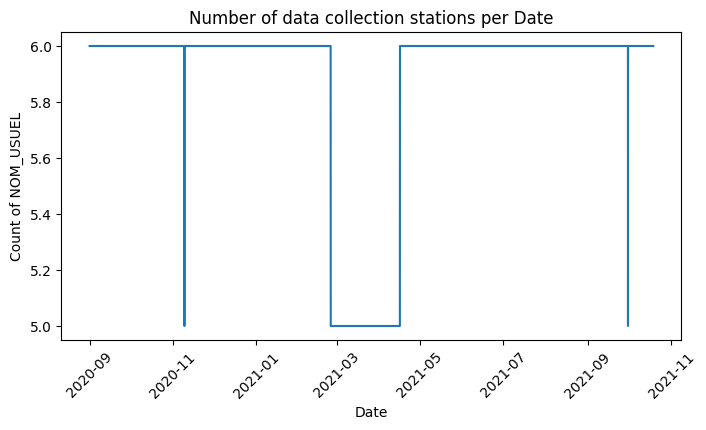

In [199]:
# check the number of stations :
plt.figure(figsize=(8, 4))
plt.plot(filtered_weather.groupby("date")["NOM_USUEL"].count(), linestyle="-")
plt.title("Number of data collection stations per Date")
plt.xlabel("Date")
plt.ylabel("Count of NOM_USUEL")
plt.xticks(rotation=45)
plt.grid(False)
plt.show()

#### Missing values : 

In [200]:
# Identify columns where all values are NaN
empty_columns = filtered_weather.columns[filtered_weather.isnull().all()]

# Print the names of these columns
print(f"Columns with no values: {empty_columns.tolist()}")

Columns with no values: ['FF2', 'QFF2', 'DD2', 'QDD2', 'FXI2', 'QFXI2', 'DXI2', 'QDXI2', 'HXI2', 'QHXI2', 'DXI3S', 'DHUMEC', 'QDHUMEC', 'GEOP', 'QGEOP', 'N', 'QN', 'NBAS', 'QNBAS', 'CL', 'QCL', 'CM', 'QCM', 'CH', 'QCH', 'N1', 'QN1', 'C1', 'QC1', 'B1', 'QB1', 'N2', 'QN2', 'C2', 'QC2', 'B2', 'QB2', 'N3', 'QN3', 'C3', 'QC3', 'B3', 'QB3', 'N4', 'QN4', 'C4', 'QC4', 'B4', 'QB4', 'W1', 'QW1', 'W2', 'QW2', 'SOL', 'QSOL', 'SOLNG', 'QSOLNG', 'TMER', 'QTMER', 'VVMER', 'QVVMER', 'ETATMER', 'QETATMER', 'DIRHOULE', 'QDIRHOULE', 'HVAGUE', 'QHVAGUE', 'PVAGUE', 'QPVAGUE', 'HNEIGEF', 'QHNEIGEF', 'TSNEIGE', 'QTSNEIGE', 'TUBENEIGE', 'QTUBENEIGE', 'HNEIGEFI3', 'QHNEIGEFI3', 'HNEIGEFI1', 'QHNEIGEFI1', 'ESNEIGE', 'QESNEIGE', 'CHARGENEIGE', 'QCHARGENEIGE', 'DIR', 'QDIR', 'DIR2', 'QDIR2', 'DIF', 'QDIF', 'DIF2', 'QDIF2', 'UV', 'QUV', 'UV2', 'QUV2', 'UV_INDICE', 'QUV_INDICE', 'INFRAR', 'QINFRAR', 'INFRAR2', 'QINFRAR2', 'TLAGON', 'QTLAGON', 'TVEGETAUX', 'QTVEGETAUX', 'ECOULEMENT', 'QECOULEMENT']


In [201]:
# Drop columns that are completely empty (all values are NaN)
filtered_weather = filtered_weather.dropna(axis=1, how='all')

In [202]:
filtered_weather.shape

(58246, 97)

In [203]:
# Calculate the total number of missing values per column
na_counts = filtered_weather.isnull().sum()

# Filter for columns with more than 10 missing values
columns_with_na = na_counts[na_counts > 10]

# Calculate the percentage of missing values per column
na_percentage = (columns_with_na / len(filtered_weather)) * 100

# Combine counts and percentages into a DataFrame for better display
na_summary = pd.DataFrame({
    'Number of NAs': columns_with_na,
    'Percentage of NAs': na_percentage
})

# Sort the summary in descending order based on the number of missing values
na_summary = na_summary.sort_values(by='Number of NAs', ascending=False)

# Display the summary
na_summary.head(80)

,Number of NAs,Percentage of NAs
QDXI3S,58221,99.957079
NEIGETOT,48346,83.003125
DRR1,48343,82.997974
QNEIGETOT,48342,82.996257
DVV200,48339,82.991107
...,...,...
QFF,29941,51.404388
FF,29941,51.404388
RR1,18794,32.266593
QRR1,18602,31.936957


In [204]:
filtered_weather.head()

,NUM_POSTE,NOM_USUEL,LAT,LON,ALTI,RR1,QRR1,DRR1,QDRR1,FF,...,QNEIGETOT,GLO,QGLO,GLO2,QGLO2,INS,QINS,INS2,QINS2,date
5856,75106001,LUXEMBOURG,48.844667,2.333833,46,0.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-09-01 00:00:00
5857,75106001,LUXEMBOURG,48.844667,2.333833,46,0.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-09-01 01:00:00
5858,75106001,LUXEMBOURG,48.844667,2.333833,46,0.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-09-01 02:00:00
5859,75106001,LUXEMBOURG,48.844667,2.333833,46,0.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-09-01 03:00:00
5860,75106001,LUXEMBOURG,48.844667,2.333833,46,0.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-09-01 04:00:00


In [188]:
# Calculate the percentage of missing values per column
na_percentage = filtered_weather.isnull().mean() * 100

# Identify columns with more than 30% missing values
columns_to_drop = na_percentage[na_percentage > 30].index

print(columns_to_drop)
# Drop these columns from the DataFrame
# filtered_weather = filtered_weather.drop(columns=columns_to_drop)


Index(['RR1', 'QRR1', 'DRR1', 'QDRR1', 'FF', 'QFF', 'DD', 'QDD', 'FXY', 'QFXY',
       'DXY', 'QDXY', 'HXY', 'QHXY', 'FXI', 'QFXI', 'DXI', 'QDXI', 'HXI',
       'QHXI', 'FXI3S', 'QFXI3S', 'QDXI3S', 'HFXI3S', 'QHFXI3S', 'TD', 'QTD',
       'T10', 'QT10', 'T20', 'QT20', 'T50', 'QT50', 'T100', 'QT100', 'TNSOL',
       'QTNSOL', 'TN50', 'QTN50', 'TCHAUSSEE', 'QTCHAUSSEE', 'U', 'QU', 'UN',
       'QUN', 'HUN', 'QHUN', 'UX', 'QUX', 'HUX', 'QHUX', 'DHUMI40', 'QDHUMI40',
       'DHUMI80', 'QDHUMI80', 'TSV', 'QTSV', 'PMER', 'QPMER', 'PSTAT',
       'QPSTAT', 'PMERMIN', 'QPMERMIN', 'VV', 'QVV', 'DVV200', 'QDVV200', 'WW',
       'QWW', 'NEIGETOT', 'QNEIGETOT', 'GLO', 'QGLO', 'GLO2', 'QGLO2', 'INS',
       'QINS', 'INS2', 'QINS2'],
      dtype='object')


In [205]:
filtered_weather = filtered_weather.drop(columns=["NUM_POSTE", "NOM_USUEL", "LAT", "LON", "ALTI"])

In [206]:
# Ensure the 'date' column is in datetime format
filtered_weather['date'] = pd.to_datetime(filtered_weather['date'])

# Group the DataFrame by the 'date' column and calculate the mean for each group
grouped_data = filtered_weather.groupby('date').mean().reset_index()


In [207]:
grouped_data.shape

(9911, 92)

In [208]:
grouped_data.head()

,date,RR1,QRR1,DRR1,QDRR1,FF,QFF,DD,QDD,FXY,...,NEIGETOT,QNEIGETOT,GLO,QGLO,GLO2,QGLO2,INS,QINS,INS2,QINS2
0,2020-09-01 00:00:00,0.0,1.0,0.0,9.0,2.566667,1.0,123.333333,1.0,2.766667,...,0.0,9.0,0.0,9.0,0.0,9.0,0.0,9.0,0.0,9.0
1,2020-09-01 01:00:00,0.0,1.0,0.0,9.0,1.900000,1.0,123.333333,1.0,2.866667,...,0.0,9.0,0.0,9.0,0.0,9.0,0.0,9.0,0.0,9.0
2,2020-09-01 02:00:00,0.0,1.0,0.0,9.0,1.400000,1.0,110.000000,1.0,2.033333,...,0.0,9.0,0.0,9.0,0.0,9.0,0.0,9.0,0.0,9.0
3,2020-09-01 03:00:00,0.0,1.0,0.0,9.0,1.100000,1.0,113.333333,1.0,1.600000,...,0.0,9.0,0.0,9.0,0.0,9.0,0.0,9.0,0.0,9.0
4,2020-09-01 04:00:00,0.0,1.0,0.0,9.0,1.100000,1.0,103.333333,1.0,1.366667,...,0.0,9.0,0.0,9.0,0.0,9.0,0.0,9.0,0.0,9.0


In [211]:
# Count the number of missing values in each column
missing_values = grouped_data.isnull().sum()

# Filter to show only columns with missing values
missing_values_with_na = missing_values[missing_values > 0]

# Display the filtered result
print(missing_values_with_na)

DRR1            8
QDRR1           8
FXI3S           2
QFXI3S          2
QDXI3S       9898
HFXI3S          2
QHFXI3S         2
DVV200          4
QDVV200         4
WW              3
QWW             3
NEIGETOT       11
QNEIGETOT       7
dtype: int64


In [212]:
# we drop QDXI3S because too many NAs
grouped_data = grouped_data.drop(columns=['QDXI3S'])

In [213]:
# to replace NAs in columns with NAs:
grouped_data = grouped_data.interpolate(method="linear")

In [214]:
# Count the number of missing values in each column
missing_values = grouped_data.isnull().sum()
print(missing_values)

date     0
RR1      0
QRR1     0
DRR1     0
QDRR1    0
        ..
QGLO2    0
INS      0
QINS     0
INS2     0
QINS2    0
Length: 91, dtype: int64


In [215]:
# Basic statistics of the numerical columns
numerical_columns = grouped_data.select_dtypes(include=['float64', 'int64']).columns
df_external_numerical = grouped_data[numerical_columns]

df_external_numerical.describe()


,RR1,QRR1,DRR1,QDRR1,FF,QFF,DD,QDD,FXY,QFXY,...,NEIGETOT,QNEIGETOT,GLO,QGLO,GLO2,QGLO2,INS,QINS,INS2,QINS2
count,9911.000000,9911.0,9911.00000,9911.000000,9911.000000,9911.000000,9911.000000,9911.0,9911.000000,9911.0,...,9911.000000,9911.000000,9911.000000,9911.000000,9911.000000,9911.000000,9911.000000,9911.000000,9911.000000,9911.000000
mean,0.084862,1.0,4.93825,8.908788,3.988096,1.002960,179.420005,1.0,4.842115,1.0,...,0.012915,8.874079,48.920997,8.997175,48.914136,8.996771,12.960801,8.997578,12.963071,8.997175
std,0.489906,0.0,14.23178,0.620987,1.914488,0.088795,90.885561,0.0,2.076287,0.0,...,0.134152,0.995796,75.792628,0.106272,75.775356,0.113604,21.138612,0.098394,21.154793,0.106272
min,0.000000,1.0,0.00000,3.000000,0.000000,1.000000,0.000000,1.0,0.350000,1.0,...,0.000000,1.000000,0.000000,5.000000,0.000000,5.000000,0.000000,5.000000,0.000000,5.000000
25%,0.000000,1.0,0.00000,9.000000,2.500000,1.000000,110.000000,1.0,3.266667,1.0,...,0.000000,9.000000,0.000000,9.000000,0.000000,9.000000,0.000000,9.000000,0.000000,9.000000
50%,0.000000,1.0,0.00000,9.000000,3.850000,1.000000,196.666667,1.0,4.700000,1.0,...,0.000000,9.000000,1.000000,9.000000,1.000000,9.000000,0.000000,9.000000,0.000000,9.000000
75%,0.000000,1.0,0.00000,9.000000,5.266667,1.000000,236.666667,1.0,6.233333,1.0,...,0.000000,9.000000,77.000000,9.000000,77.500000,9.000000,21.500000,9.000000,21.500000,9.000000
max,20.325000,1.0,60.00000,9.000000,13.600000,3.666667,360.000000,1.0,14.900000,1.0,...,4.000000,9.000000,335.500000,9.000000,334.500000,9.000000,60.000000,9.000000,60.000000,9.000000


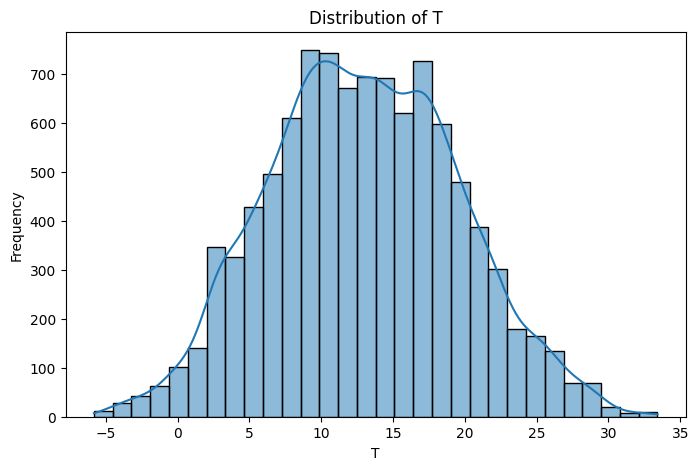

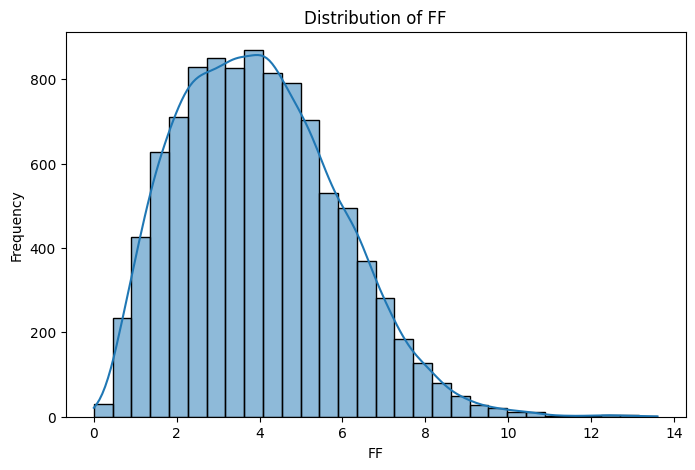

In [216]:
# for col in ['T', 'FF', 'RR24', 'ht_neige','etat_sol']:
for col in ['T', 'FF']:
    if col in df_external_numerical.columns:
        plt.figure(figsize=(8, 5))
        sns.histplot(df_external_numerical[col], kde=True, bins=30)
        plt.title(f"Distribution of {col}")
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.show()

In [ ]:
grouped_data.to_csv("/Users/louisleibovici/Documents/VS_Code/Bike_counters DSB Project/bike_counters/external_data/grouped_data.csv", index=False)

## Correlation between the remaining weather features : (we suspect strong multicolinearity in this data set)

In [222]:
# Compute the correlation matrix
correlation_matrix = df_external_numerical.corr()

# Filter correlations greater than 0.3 and exclude diagonal (self-correlation)
correlations_above_threshold = correlation_matrix.where((correlation_matrix > 0.3) & (correlation_matrix != 1))

# Print the filtered correlations
for col in correlations_above_threshold.columns:
    high_corrs = correlations_above_threshold[col].dropna()
    if not high_corrs.empty:
        print(f"Correlations for {col}:")
        print(high_corrs)
        print("\n")

Correlations for RR1:
DRR1    0.493404
WW      0.427436
Name: RR1, dtype: float64


Correlations for DRR1:
RR1        0.493404
U          0.323350
UN         0.302680
UX         0.313412
DHUMI80    0.347108
WW         0.792864
Name: DRR1, dtype: float64


Correlations for FF:
FXY      0.958348
FXI      0.920564
FXI3S    0.884839
Name: FF, dtype: float64


Correlations for DD:
DXY    0.890741
DXI    0.851863
Name: DD, dtype: float64


Correlations for FXY:
FF       0.958348
FXI      0.959884
FXI3S    0.928610
Name: FXY, dtype: float64


Correlations for DXY:
DD     0.890741
DXI    0.896976
Name: DXY, dtype: float64


Correlations for HXY:
HXI       0.991589
HFXI3S    0.991310
HTN       0.986874
HTX       0.989315
HUN       0.988395
HUX       0.986620
Name: HXY, dtype: float64


Correlations for FXI:
FF       0.920564
FXY      0.959884
FXI3S    0.970599
Name: FXI, dtype: float64


Correlations for DXI:
DD     0.851863
DXY    0.896976
Name: DXI, dtype: float64


Correlations for HXI:
HXY 

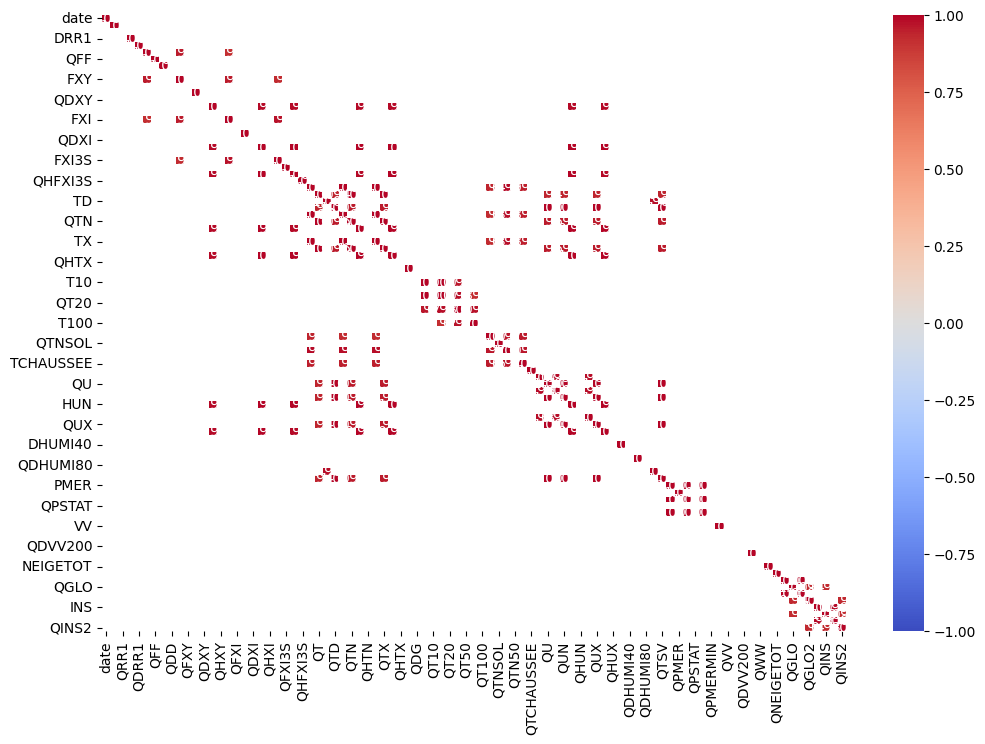

In [221]:
# Compute the correlation matrix
correlation_matrix = grouped_data.corr()

# Filter correlations greater than absolute 0.2
filtered_correlation = correlation_matrix[(correlation_matrix.abs() > 0.9)]

# Display the filtered correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(filtered_correlation, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.show()


For multicolinarity purposes : 

- pmer and pres ultra correlated = one is function of each other. keep only one of the two 
- raf10, rafper and ff ultra correlated. we decide to keep ff and not raf10 and rafper
- t and td ultra correlated . t is temperature and td is "point de rosée". we keep t 
- tend and tend24 : we keep both
- rr1, rr3, rr6, rr12, rr24 : précipitaiton en mm : we keep them all. 
- same thing for ww, w1, w2 : temps présent, temps passé 1, temps passé 2 (soleil, pluie, neige, ....)
- cod_tend and tend : type de tendance barométrique (en texte) vs variation de pression en 3h . we remove cod and keep variation de pression en 3h : tend 
- etat_sol and ht_neige : corrrelated. 

En conclusion: we remove : pmer, raf10, rafper, td, cod


In [39]:
external_data_cleaned = external_data_cleaned.drop(columns=['pmer', 'raf10', 'rafper', 'td', 'cod_tend'])

In [40]:
external_data_cleaned.head()

,date,tend,dd,ff,t,u,vv,ww,w1,w2,...,nbas,pres,tend24,etat_sol,ht_neige,rr1,rr3,rr6,rr12,rr24
0,2021-01-01 00:00:00,80,270,1.8,272.75,96,990,2,0.0,0.0,...,1.0,99680,470.0,1.0,0.00,0.0,0.0,0.0,0.0,2.0
1,2021-01-01 03:00:00,110,300,1.7,271.25,98,210,40,0.0,0.0,...,1.0,99790,750.0,1.0,0.00,0.0,0.0,0.0,0.0,1.2
2,2021-01-01 06:00:00,30,290,2.6,271.95,98,3660,3,1.0,1.0,...,5.0,99820,900.0,1.0,0.00,0.0,0.0,0.0,0.0,1.0
3,2021-01-01 09:00:00,150,280,1.7,272.45,97,3500,10,1.0,1.0,...,1.0,99970,860.0,13.0,0.01,0.0,0.2,0.2,0.2,0.2
4,2021-01-01 12:00:00,30,50,1.0,276.95,82,8000,2,2.0,2.0,...,7.0,100000,790.0,11.0,-0.01,0.0,0.0,0.2,0.2,0.2


## Correlation analysis between weather features and our target variable, log_bike_count :

In [41]:
# We decide to merge this external_data_cleaned with the training and testing set to look at the correlation between these weather features
# and log bike count

# we convert 'date' column to datetime in all datasets
external_data_cleaned['date'] = pd.to_datetime(external_data['date'])
df_train['date'] = pd.to_datetime(df_train['date']).astype('datetime64[ns]')

# Sort datasets by date
external_data_cleaned.sort_values('date', inplace=True)
df_train.sort_values('date', inplace=True)

# Perform nearest match
training_set_merged = pd.merge_asof(df_train, external_data_cleaned, on='date', direction='nearest')

In [42]:
training_set_merged.head()

,index,date,counter_id,counter_name,site_id,site_name,bike_count,counter_installation_date,coordinates,counter_technical_id,...,nbas,pres,tend24,etat_sol,ht_neige,rr1,rr3,rr6,rr12,rr24
0,8838,2020-09-01 01:00:00,100007049-101007049,28 boulevard Diderot O-E,100007049,28 boulevard Diderot,1.0,2013-01-18,"48.846028,2.375429",Y2H15027244,...,0.0,100960,120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,242247,2020-09-01 01:00:00,100056226-103056226,Face au 8 avenue de la porte de Charenton SE-NO,100056226,Face au 8 avenue de la porte de Charenton,1.0,2019-11-01,"48.830331,2.400551",Y2H19070370,...,0.0,100960,120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,107931,2020-09-01 01:00:00,100047545-104047545,Face 104 rue d'Aubervilliers S-N,100047545,Face 104 rue d'Aubervilliers,1.0,2018-11-29,"48.890457,2.368852",Y2H18086321,...,0.0,100960,120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,448512,2020-09-01 01:00:00,100060178-102060178,90 Rue De Sèvres NE-SO,100060178,90 Rue De Sèvres,21.0,2020-07-22,"48.84638,2.31529",Y2H20052705,...,0.0,100960,120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,251159,2020-09-01 01:00:00,100056327-103056327,Face au 4 avenue de la porte de Bagnolet E-O,100056327,Face au 4 avenue de la porte de Bagnolet,2.0,2019-11-06,"48.86461,2.40969",Y2H19070372,...,0.0,100960,120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
training_set_merged.columns

Index(['index', 'date', 'counter_id', 'counter_name', 'site_id', 'site_name',
       'bike_count', 'counter_installation_date', 'coordinates',
       'counter_technical_id', 'latitude', 'longitude', 'log_bike_count',
       'week', 'installation_year', 'year', 'month', 'day', 'weekday', 'hour',
       'day_type', 'tend', 'dd', 'ff', 't', 'u', 'vv', 'ww', 'w1', 'w2', 'n',
       'nbas', 'pres', 'tend24', 'etat_sol', 'ht_neige', 'rr1', 'rr3', 'rr6',
       'rr12', 'rr24'],
      dtype='object')

In [44]:
# Define the columns to keep
columns_to_keep = ['tend', 'dd', 'ff', 't', 'u', 'vv', 'ww', 'w1', 'w2', 'n',
                   'nbas', 'pres', 'tend24', 'etat_sol', 'ht_neige', 'rr1',
                   'rr3', 'rr6', 'rr12', 'rr24', 'log_bike_count']

# Filter the DataFrame to keep only the specified columns
filtered_data = training_set_merged[columns_to_keep]

In [45]:
# Calculate correlations between each feature and log_bike_count
correlations = filtered_data.corr()

# Extract correlations of each feature with log_bike_count
log_bike_count_corr = correlations['log_bike_count']

# Sort the correlations in descending order
log_bike_count_corr_sorted = log_bike_count_corr.sort_values(ascending=False)

# Display the correlations
print(log_bike_count_corr_sorted)

log_bike_count    1.000000
t                 0.328255
ff                0.138579
vv                0.074629
pres              0.043318
n                 0.026855
tend24            0.014037
ht_neige          0.005944
tend             -0.006736
dd               -0.016748
nbas             -0.019831
w1               -0.022615
w2               -0.025386
rr3              -0.028167
rr1              -0.029647
rr6              -0.033618
rr24             -0.052682
rr12             -0.056809
ww               -0.091750
etat_sol         -0.104620
u                -0.347084
Name: log_bike_count, dtype: float64


# Outlier management:
For outlier management, we will only consider numerical columns:

In [46]:
numerical_columns = external_data_cleaned.select_dtypes(include=['float64', 'int64']).columns
print(external_data_cleaned[numerical_columns].describe())

              tend           dd           ff            t            u  \
count  3322.000000  3322.000000  3322.000000  3322.000000  3322.000000   
mean     -0.237809   184.379892     3.654154   285.877905    74.775135   
std     122.191314   103.708084     2.000353     6.851700    17.022427   
min    -750.000000     0.000000     0.000000   267.650000    24.000000   
25%     -70.000000    80.000000     2.200000   280.950000    63.000000   
50%       0.000000   200.000000     3.400000   285.850000    79.000000   
75%      70.000000   260.000000     4.900000   290.650000    89.000000   
max     720.000000   360.000000    14.600000   307.450000   100.000000   

                 vv           ww           w1           w2            n  \
count   3322.000000  3322.000000  3322.000000  3322.000000  3322.000000   
mean   20142.338952     9.056291     2.075256     1.759783    66.377483   
std    10283.556918    18.554513     2.163255     1.709240    35.729894   
min      120.000000     0.000000 

We look for outliers and we notice for example that the variables rr3, rr6, rr12, rr24 have negative values ​​which is impossible.

Let's apply a z-score test : 

In [47]:
from scipy.stats import zscore
import numpy as np
#calcul of the z-score
z_scores = external_data_cleaned[numerical_columns].apply(zscore)

#possible outlier if: (z-score > 3 or < -3)
outliers = (np.abs(z_scores) > 3)

outlier_counts = outliers.sum()
print("Nombre d'outliers par colonne :\n", outlier_counts)


Nombre d'outliers par colonne :
 tend        36
dd           0
ff          20
t            2
u            0
vv          34
ww          47
w1          15
w2          27
n            0
nbas         0
pres        40
tend24      33
etat_sol    52
ht_neige    48
rr1         47
rr3         66
rr6         71
rr12        74
rr24        82
dtype: int64


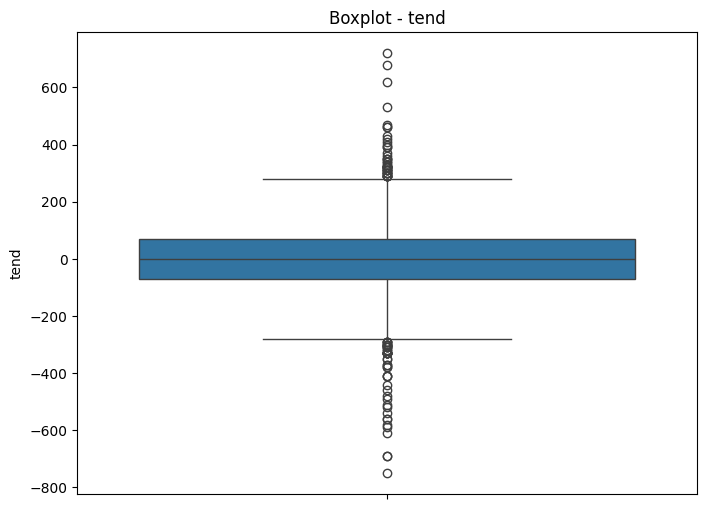

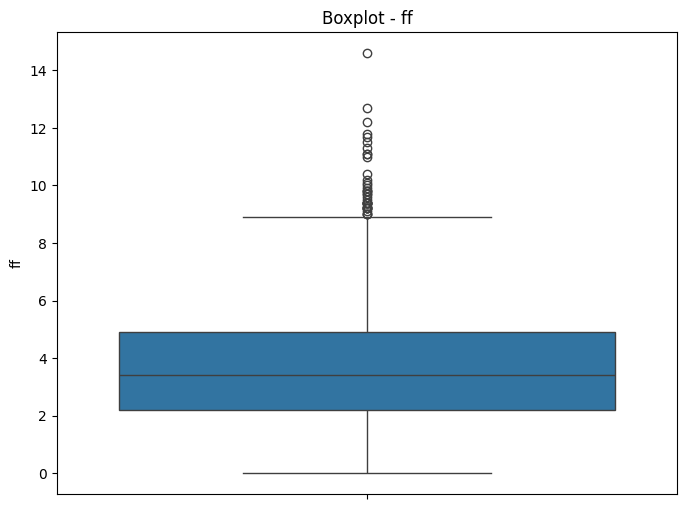

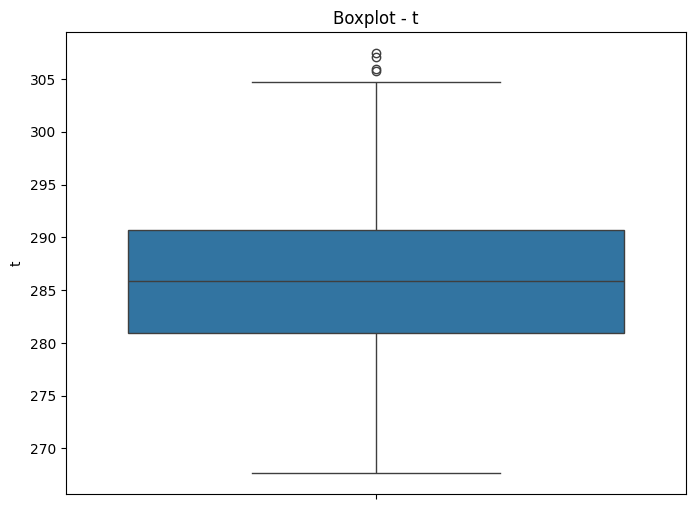

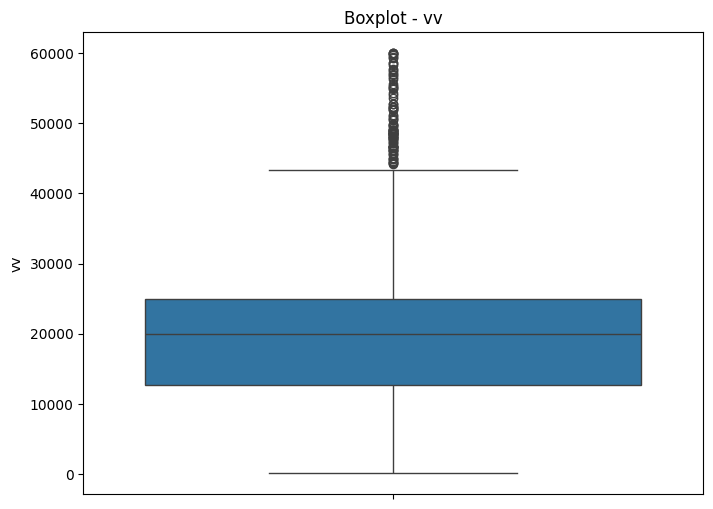

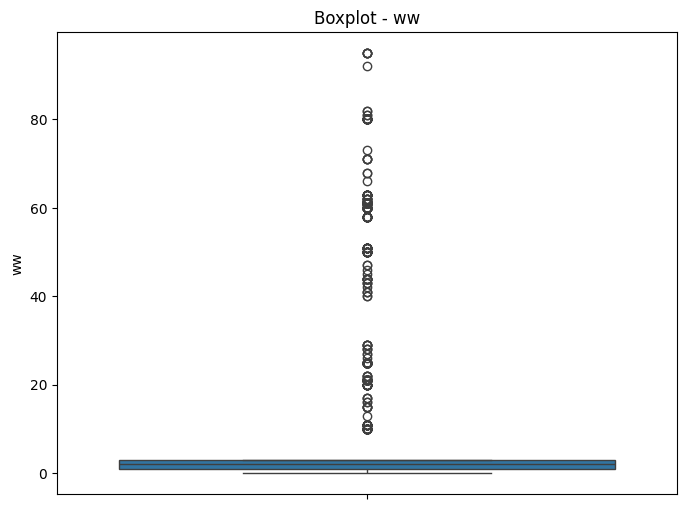

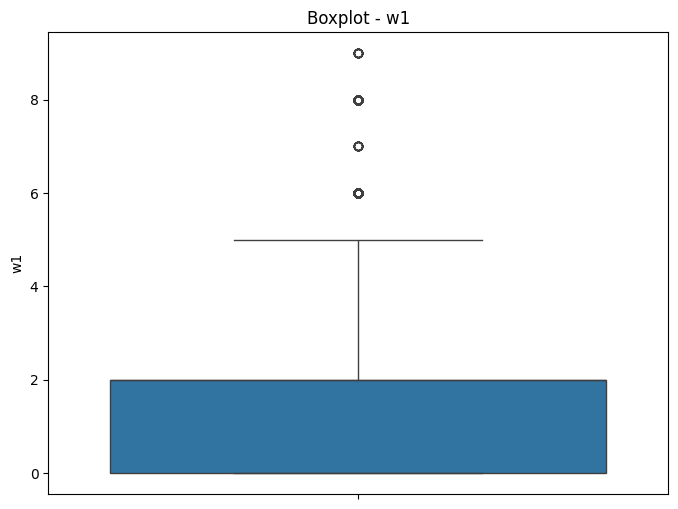

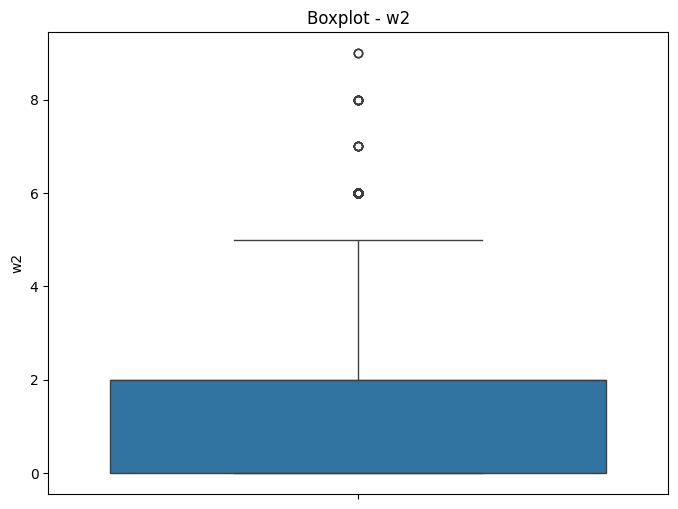

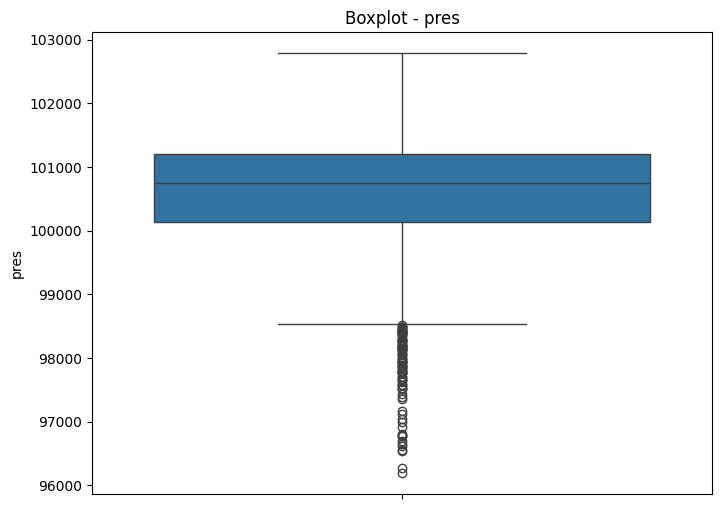

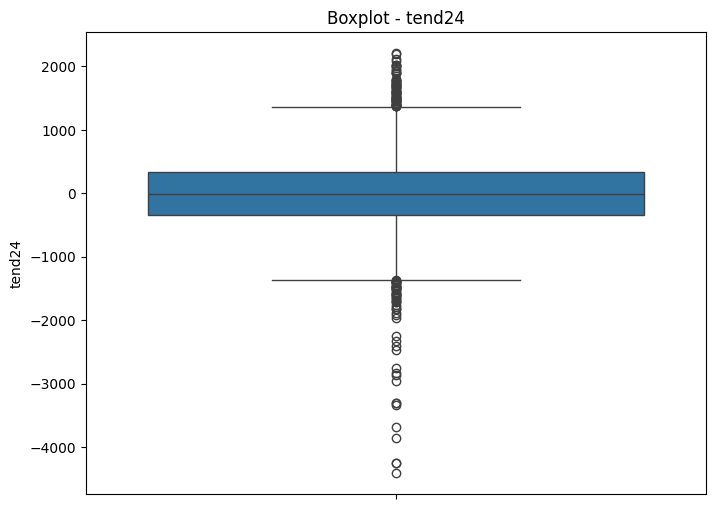

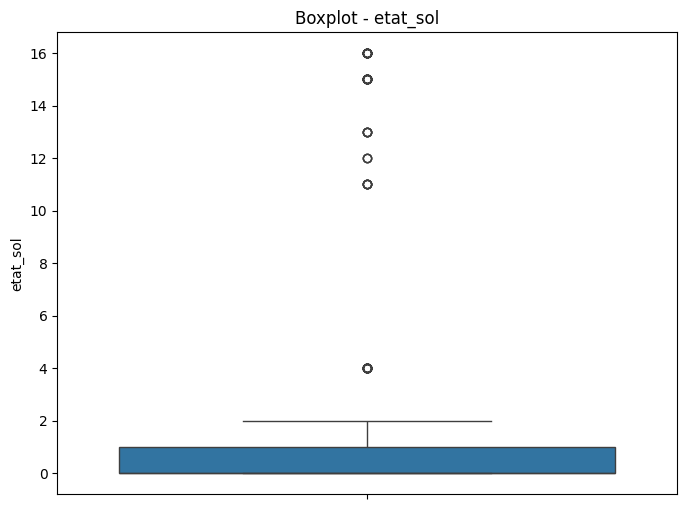

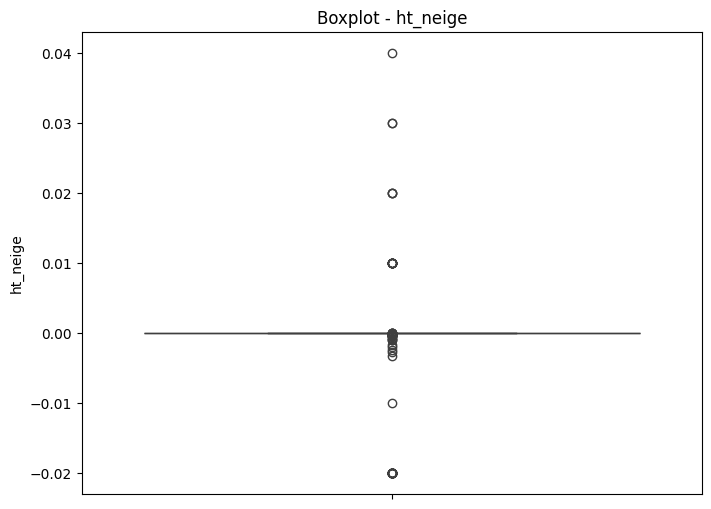

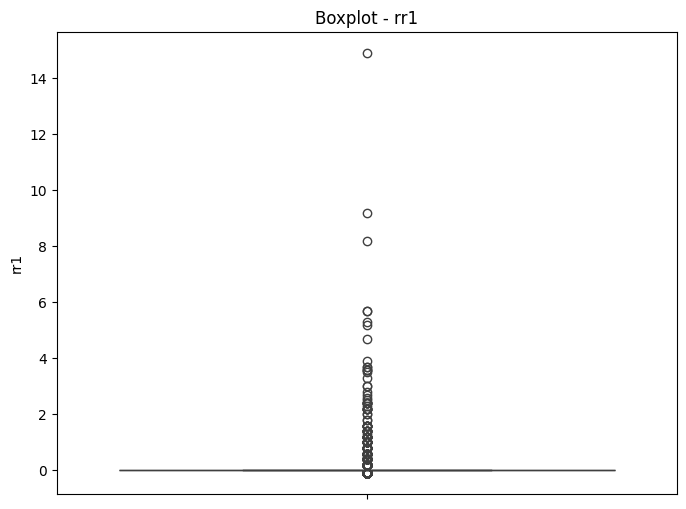

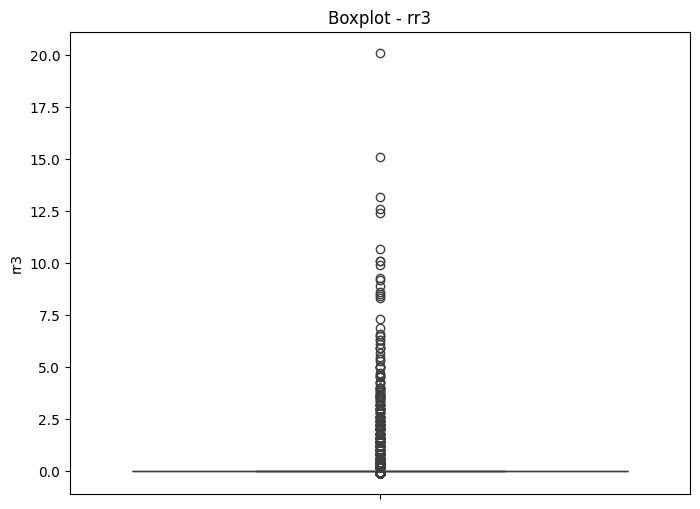

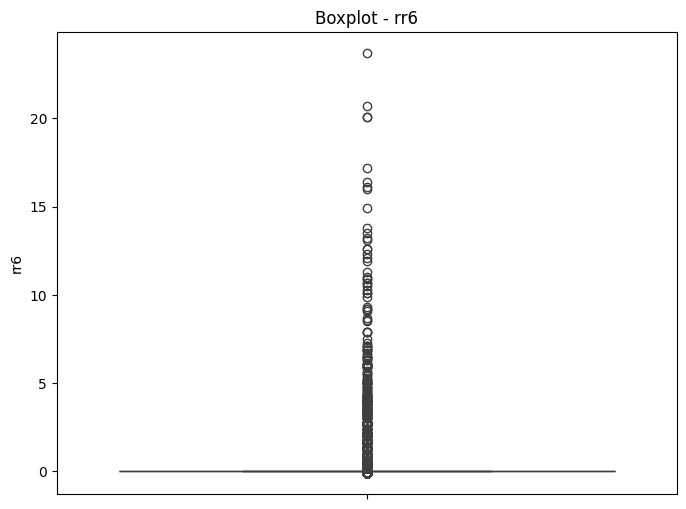

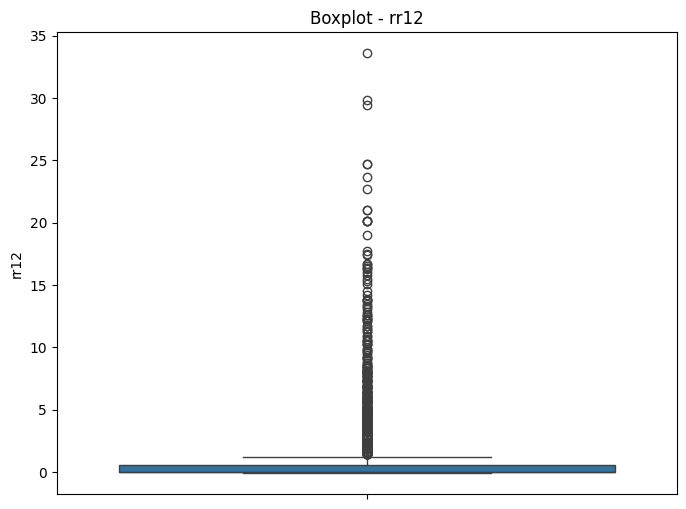

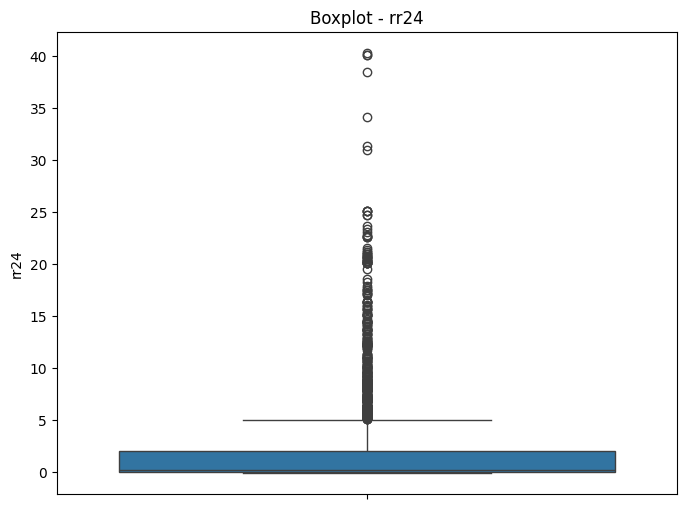

<Figure size 640x480 with 0 Axes>

In [48]:
columns_with_outliers = outlier_counts[outlier_counts > 0].index

# To visualize the outliers :
for col in columns_with_outliers:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=external_data, y=col)
    plt.title(f"Boxplot - {col}")
    plt.ylabel(col)
    plt.show()


plt.tight_layout()
plt.show()

For ff : 
High wind speeds are unusual but possible in extreme weather conditions. Outliers may represent storms or strong winds.

for tend :
Significant pressure changes can happen due to rapid weather transitions, such as storm

for vv : 
High values are generally plausible unless they exceed realistic maximums. max here is 60,000m. 
-> one solution: to create a max : for values above 10,000m for example : leave 10,000m. Indeed, above this threshold, it will not make any difference on whether people would take a bike or not. 

On remarque que certaines variables ne sont pas vraiment des outliers : ex: rr1, rr3, rr6, rr12, rr24( qui correspondent au Cumuls de précipitations sur 1h, 3h, 6h, 12h, 24h (en mm)) : ces variables possèdent simplement une grande disparité de values car elles n'arrivent qu'occasionnellement et aveccdes quantité très disparates.

In [49]:
# We decide to replace negative values for the rr variables with 0
columns_to_modify = ['rr1', 'rr3', 'rr6', 'rr12', 'rr24']

for col in columns_to_modify:
    external_data_cleaned.loc[external_data_cleaned[col] < 0, col] = 0

In [50]:
# For the vv variable : we decide (as explained above) to create a max value : values above 10,000m will be equal to 10,000m
external_data_cleaned.loc[external_data_cleaned['vv'] > 10000, 'vv'] = 10000

In [51]:
external_data_cleaned.describe()

,date,tend,dd,ff,t,u,vv,ww,w1,w2,...,nbas,pres,tend24,etat_sol,ht_neige,rr1,rr3,rr6,rr12,rr24
count,3322,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,...,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000
mean,2021-03-27 18:37:39.482239488,-0.237809,184.379892,3.654154,285.877905,74.775135,9297.408188,9.056291,2.075256,1.759783,...,3.873871,100600.930163,-2.664058,0.670078,-0.000108,0.086635,0.250843,0.501445,0.999308,1.999518
min,2020-09-01 00:00:00,-750.000000,0.000000,0.000000,267.650000,24.000000,120.000000,0.000000,0.000000,0.000000,...,0.000000,96190.000000,-4410.000000,0.000000,-0.020000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2020-12-13 18:45:00,-70.000000,80.000000,2.200000,280.950000,63.000000,10000.000000,1.000000,0.000000,0.000000,...,1.000000,100130.000000,-340.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2021-03-27 19:30:00,0.000000,200.000000,3.400000,285.850000,79.000000,10000.000000,2.000000,2.000000,2.000000,...,4.000000,100750.000000,-10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000
75%,2021-07-09 17:15:00,70.000000,260.000000,4.900000,290.650000,89.000000,10000.000000,3.000000,2.000000,2.000000,...,7.000000,101200.000000,340.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.550000,2.000000
max,2021-10-21 12:00:00,720.000000,360.000000,14.600000,307.450000,100.000000,10000.000000,95.000000,9.000000,9.000000,...,9.000000,102790.000000,2210.000000,16.000000,0.040000,14.900000,20.100000,23.700000,33.600000,40.300000
std,NaN,122.191314,103.708084,2.000353,6.851700,17.022427,1889.204930,18.554513,2.163255,1.709240,...,3.071964,913.831886,615.813816,1.910557,0.002315,0.503611,1.056362,1.704749,2.706477,4.174655


## Creation of scores for groups of weather variables (ex : one group for wind features, another for rain features, ....)

We want to group the variables in groups and create a combination score for each group of variables. For this, we can use simple or weighted aggregation methods depending on the characteristics of the variables and their likely impact on the target (log_bike_count).

In [52]:
external_data_cleaned.head()

,date,tend,dd,ff,t,u,vv,ww,w1,w2,...,nbas,pres,tend24,etat_sol,ht_neige,rr1,rr3,rr6,rr12,rr24
3082,2020-09-01 00:00:00,-10,340,1.6,285.75,81,10000,1,0.0,0.0,...,0.0,100960,120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3083,2020-09-01 03:00:00,-60,290,1.1,283.95,88,10000,2,0.0,0.0,...,0.0,100900,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3084,2020-09-01 06:00:00,10,360,1.8,284.25,91,10000,3,0.0,0.0,...,1.0,100910,-60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3085,2020-09-01 09:00:00,0,360,2.9,291.25,60,10000,1,0.0,0.0,...,1.0,100910,-130.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3086,2020-09-01 12:00:00,-110,40,2.6,293.95,44,10000,0,0.0,0.0,...,1.0,100800,-230.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
external_data_cleaned.columns

Index(['date', 'tend', 'dd', 'ff', 't', 'u', 'vv', 'ww', 'w1', 'w2', 'n',
       'nbas', 'pres', 'tend24', 'etat_sol', 'ht_neige', 'rr1', 'rr3', 'rr6',
       'rr12', 'rr24'],
      dtype='object')

In [54]:
# creation of a pressure score in hPA :
external_data_cleaned['pressure_score'] = 0.5 * external_data_cleaned['pres'] + \
                                  3 * external_data_cleaned['tend'] + \
                                  2 * external_data_cleaned['tend24']


# we rename ff with wind speed :
external_data_cleaned.rename(columns={'ff': 'wind_speed'}, inplace=True)

# we rename t with temperature :
external_data_cleaned.rename(columns={'t': 'temperature'}, inplace=True)

# we rename vv with visibility :
external_data_cleaned.rename(columns={'vv': 'visibility'}, inplace=True)

# we rename u with humidity :
external_data_cleaned.rename(columns={'u': 'humidity'}, inplace=True)

# creation of a cloudiness score :
external_data_cleaned['nbas_percent'] = (external_data_cleaned['nbas'] / 8) * 100 # nbas is in octas from 0 to 8
external_data_cleaned['cloudiness_score'] = external_data_cleaned['n'] + external_data_cleaned['nbas_percent']

# for ww, w1, w2 :
external_data_cleaned['weather_condition_score'] = (
    0.6 * external_data_cleaned['ww'] +
    0.3 * external_data_cleaned['w1'] +
    0.1 * external_data_cleaned['w2'] )

# Precipitation score
external_data_cleaned['precipitation_score'] = (0.4 * external_data_cleaned['rr1']) + \
                                       (0.3 * external_data_cleaned['rr3']) + \
                                       (0.2 * external_data_cleaned['rr6']) + \
                                       (0.1 * external_data_cleaned['rr24'])

# we rename ht_neige to snow_score :
external_data_cleaned['snow_score'] = external_data_cleaned['ht_neige']



In [55]:
external_data_cleaned.columns

Index(['date', 'tend', 'dd', 'wind_speed', 'temperature', 'humidity',
       'visibility', 'ww', 'w1', 'w2', 'n', 'nbas', 'pres', 'tend24',
       'etat_sol', 'ht_neige', 'rr1', 'rr3', 'rr6', 'rr12', 'rr24',
       'pressure_score', 'nbas_percent', 'cloudiness_score',
       'weather_condition_score', 'precipitation_score', 'snow_score'],
      dtype='object')

In [56]:
# Define the columns to remove
columns_to_remove = ['index', 'tend', 'dd',
                     'ww', 'w1', 'w2', 'n', 'nbas', 'nbas_percent', 'pres',
                     'tend24', 'ht_neige', 'rr1', 'rr3',
                     'rr6', 'rr12', 'rr24']

# Remove the columns
external_data_cleaned = external_data_cleaned.drop(columns=columns_to_remove, errors='ignore')

# Display the resulting DataFrame
external_data_cleaned.head()

,date,wind_speed,temperature,humidity,visibility,etat_sol,pressure_score,cloudiness_score,weather_condition_score,precipitation_score,snow_score
3082,2020-09-01 00:00:00,1.6,285.75,81,10000,0.0,50690.0,0.0,0.6,0.0,0.0
3083,2020-09-01 03:00:00,1.1,283.95,88,10000,0.0,50270.0,0.0,1.2,0.0,0.0
3084,2020-09-01 06:00:00,1.8,284.25,91,10000,0.0,50365.0,22.5,1.8,0.0,0.0
3085,2020-09-01 09:00:00,2.9,291.25,60,10000,0.0,50195.0,37.5,0.6,0.0,0.0
3086,2020-09-01 12:00:00,2.6,293.95,44,10000,0.0,49610.0,102.5,0.0,0.0,0.0


In [57]:
external_data_cleaned.describe()

,date,wind_speed,temperature,humidity,visibility,etat_sol,pressure_score,cloudiness_score,weather_condition_score,precipitation_score,snow_score
count,3322,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000
mean,2021-03-27 18:37:39.482239488,3.654154,285.877905,74.775135,9297.408188,0.670078,50294.423540,114.800873,6.232330,0.410148,-0.000108
min,2020-09-01 00:00:00,0.000000,267.650000,24.000000,120.000000,0.000000,37925.000000,0.000000,0.000000,0.000000,-0.020000
25%,2020-12-13 18:45:00,2.200000,280.950000,63.000000,10000.000000,0.000000,49475.000000,50.000000,1.200000,0.000000,0.000000
50%,2021-03-27 19:30:00,3.400000,285.850000,79.000000,10000.000000,0.000000,50375.000000,127.500000,1.800000,0.020000,0.000000
75%,2021-07-09 17:15:00,4.900000,290.650000,89.000000,10000.000000,1.000000,51235.000000,177.500000,2.600000,0.340000,0.000000
max,2021-10-21 12:00:00,14.600000,307.450000,100.000000,10000.000000,16.000000,55400.000000,213.500000,60.600000,17.600000,0.040000
std,NaN,2.000353,6.851700,17.022427,1889.204930,1.910557,1644.247674,69.241982,11.738611,1.044249,0.002315


In [58]:
external_data_cleaned.columns

Index(['date', 'wind_speed', 'temperature', 'humidity', 'visibility',
       'etat_sol', 'pressure_score', 'cloudiness_score',
       'weather_condition_score', 'precipitation_score', 'snow_score'],
      dtype='object')

We can see that Ddifferent scores have widely varying ranges. For instance, pressure_score ranges from 37,925 to 55,400, while precipitation_score ranges from 0 to 17.6. 

Solution: we are going to normalize them to bring all scores to a common scale. 

using the z-score method : we center scores around 0

In [59]:
from sklearn.preprocessing import StandardScaler

columns_to_normalize = ['wind_speed', 'etat_sol', 'humidity', 'visibility', 'pressure_score', 'cloudiness_score',
                        'weather_condition_score', 'precipitation_score', 'snow_score']

scaler = StandardScaler()

external_data_cleaned[columns_to_normalize] = scaler.fit_transform(external_data_cleaned[columns_to_normalize])

external_data_cleaned.describe()

,date,wind_speed,temperature,humidity,visibility,etat_sol,pressure_score,cloudiness_score,weather_condition_score,precipitation_score,snow_score
count,3322,3.322000e+03,3322.000000,3.322000e+03,3322.000000,3.322000e+03,3.322000e+03,3.322000e+03,3.322000e+03,3.322000e+03,3.322000e+03
mean,2021-03-27 18:37:39.482239488,3.080017e-16,285.877905,2.737793e-16,0.000000,1.711120e-17,9.346995e-16,3.422241e-17,-1.197784e-16,-1.497230e-17,-1.283340e-17
min,2020-09-01 00:00:00,-1.827030e+00,267.650000,-2.983287e+00,-4.858546,-3.507769e-01,-7.523979e+00,-1.658216e+00,-5.310056e-01,-3.928272e-01,-8.594042e+00
25%,2020-12-13 18:45:00,-7.270582e-01,280.950000,-6.918466e-01,0.371954,-3.507769e-01,-4.984328e-01,-9.360019e-01,-4.287634e-01,-3.928272e-01,4.679043e-02
50%,2021-03-27 19:30:00,-1.270738e-01,285.850000,2.482314e-01,0.371954,-3.507769e-01,4.901244e-02,1.834297e-01,-3.776424e-01,-3.736718e-01,4.679043e-02
75%,2021-07-09 17:15:00,6.229068e-01,290.650000,8.357801e-01,0.371954,1.727095e-01,5.721267e-01,9.056437e-01,-3.094810e-01,-6.718521e-02,4.679043e-02
max,2021-10-21 12:00:00,5.472781e+00,307.450000,1.482084e+00,0.371954,8.025006e+00,3.105581e+00,1.425638e+00,4.632222e+00,1.646393e+01,1.732846e+01
std,NaN,1.000151e+00,6.851700,1.000151e+00,1.000151,1.000151e+00,1.000151e+00,1.000151e+00,1.000151e+00,1.000151e+00,1.000151e+00


In [60]:
external_data_cleaned.columns

Index(['date', 'wind_speed', 'temperature', 'humidity', 'visibility',
       'etat_sol', 'pressure_score', 'cloudiness_score',
       'weather_condition_score', 'precipitation_score', 'snow_score'],
      dtype='object')

In [61]:
external_data_cleaned.to_csv("/Users/louisleibovici/Documents/VS_Code/Bike_counters DSB Project/bike_counters/external_data/external_data_cleaned.csv", index=False)